<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/%ED%95%B4%EC%84%A4/ch02_04_%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.04 히스토그램

---
* 날짜:
* 이름:


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### **| 기본사용**

```
x = np.random.randn(5000) # 표준정규분포
plt.hist(x)
plt.show()
```

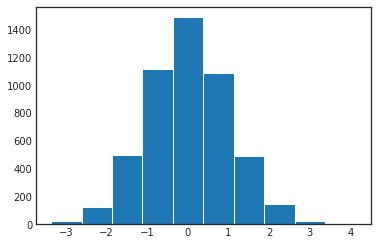

In [ ]:
x = np.random.randn(5000) # 표준정규분포
plt.hist(x)
plt.show()

#### **| 옵션**

```
plt.hist(data, 
        bins = 구간개수,
        color=색,
        edgecolor=테두리 색, 
        alpha=투명도 (0~1),
        density=정규화 여부 (True/False),
        cumulative=누적여부 (True/Fasle),  
        histtype = 플롯 형식 {'bar', 'barstacked', 'step', 'stepfilled' } default: 'bar'
        label = 레이블,
        align=눈금 위치 {'left', 'mid', 'right'}, default: 'mid'
```

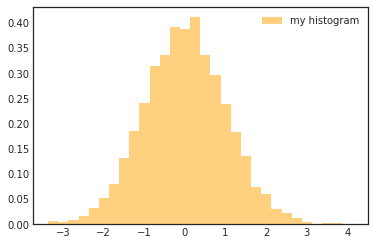

In [ ]:
plt.hist(x, 
         bins = 30,
         density=True,
         alpha=0.5,
         color='orange',
         edgecolor='none',
         label='my histogram',
         )
plt.legend()
plt.show()

#### **| 여러개의 히스토그램**

```
plt.hist([x1,x2, ..])
```

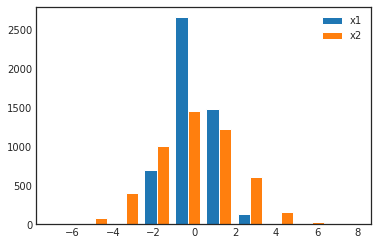

In [ ]:
plt.hist([x,x*2], label=['x1', 'x2'])
plt.legend()
plt.show()

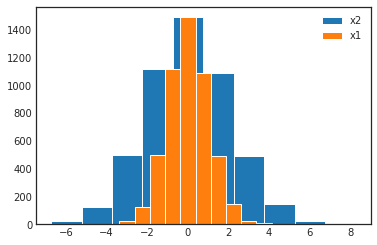

In [ ]:
plt.hist(x*2, label='x2')
plt.hist(x, label='x1')
plt.legend()
plt.show()

### (2) Seaborn 으로 그리기



#### **| 기본사용**

```
sns.histplot(x)
```

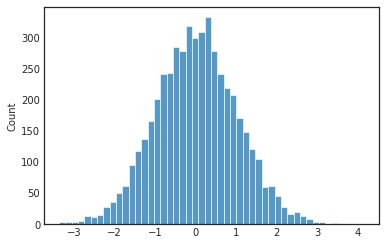

In [ ]:
sns.histplot(x)
plt.show()

#### **| 옵션**

```
seaborn.histplot(data=None, 
                 bins='auto', # 구간개수
                 cumulative=False, # 누적여부
                 element='bars', # 플롯형식 {“bars”, “step”, “poly”},
                 multiple='layer' # 다중데이터 플롯형식{“layer”, “dodge”, “stack”, “fill”},
                 fill=True, # 색칠 여부
                 shrink=1, # 너비 감소
                 kde=False, # kde선
                 color=None, # 색깔
                 log_scale=None # 로그스케일)
```

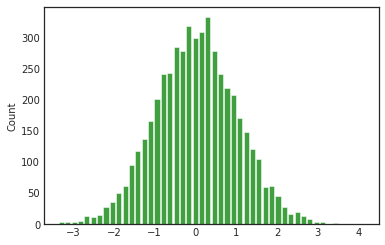

In [ ]:
sns.histplot(x, color='green', shrink=0.8)

#### **| 여러개의 히스토그램**

```
sns.histplot([x1, x2, ...])
```

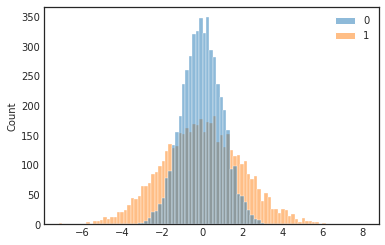

In [ ]:
sns.histplot([x, x*2])
plt.show()

#### **| DataFrame 사용**




* 데이터 프레임을 만들어 줍니다.



In [ ]:
df = pd.DataFrame(x)
df

,0
0,-2.712325
1,-0.577521
2,-0.102821
3,1.602579
4,0.325239
...,...
4995,1.894526
4996,-0.378328
4997,0.385101
4998,1.204616


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot(kind='hist')
```




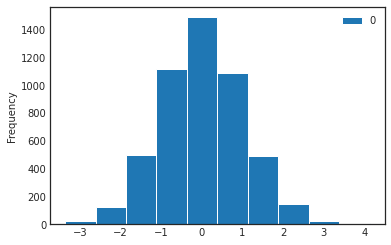

In [ ]:
df.plot(kind='hist')

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.histplot(data=df, x=x_column)
```


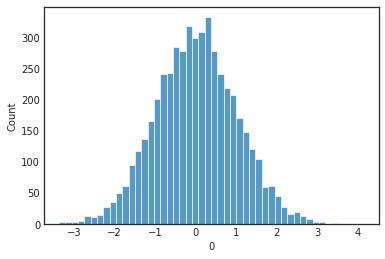

In [ ]:
sns.histplot(data=df, x=0)


## **실습**
---


### (1) `plt.hist`의 `histtypes` 옵션비교

```
x1 = np.random.normal(0, 1, 5000)
x2 = np.random.normal(0, 3, 5000)
x3 = np.random.normal(10, 3, 5000)

histtypes=['bar', 'barstacked', 'step', 'stepfilled']

```

In [ ]:
x1 = np.random.normal(0, 1, 5000)
x2 = np.random.normal(0, 3, 5000)
x3 = np.random.normal(10, 3, 5000)
histtypes=['bar', 'barstacked', 'step', 'stepfilled']

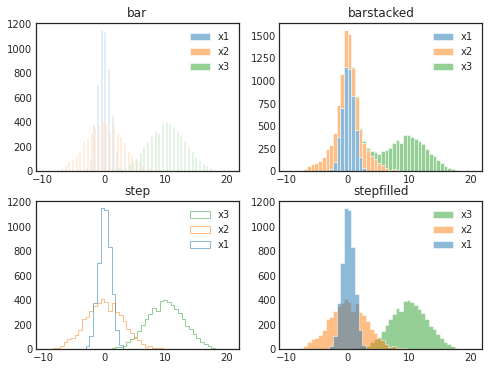

In [ ]:
style=dict(bins=50, alpha=0.5, label=['x1','x2','x3'])

plt.figure(figsize=(8,6))
for i, histtype in enumerate(histtypes):
  plt.subplot(2,2,i+1)
  plt.hist([x1, x2, x3], histtype=histtype, **style)
  plt.legend()
  plt.title(histtype)

plt.show()

### (2) 객체지향 사용하기


```
fig, ax = plt.subplots(2,2, figsize=size)
```

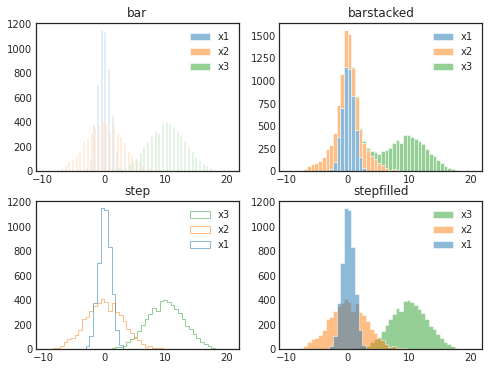

In [ ]:
style=dict(bins=50, alpha=0.5, label=['x1','x2','x3'])
fig, ax = plt.subplots(2,2, figsize=(8,6))
ax = ax.flatten()

for i, histtype in enumerate(histtypes):
  ax[i].hist([x1, x2, x3], histtype=histtype, **style)
  ax[i].set_title(histtype)
  ax[i].legend()
plt.show()

### (3) Iris 데이터 변수별 분포 그리기

```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

x_data = iris.data
print('x_data',x_data.shape)
y_data = iris.target
print('y_data',y_data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
x_data (150, 4)
y_data (150,)


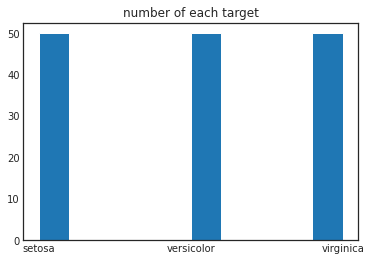

In [ ]:
plt.hist(y_data)
plt.xticks([0,1,2], labels=y_names)
plt.title('number of each target')
plt.show()

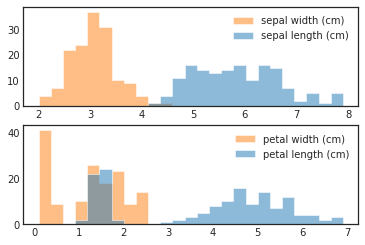

In [ ]:
plt.subplot(211)
plt.hist(x_data[:,:2], histtype='stepfilled', bins=25, alpha=.5, label=x_names[:2])
plt.legend()
plt.subplot(212)
plt.hist(x_data[:,2:], histtype='stepfilled', bins=25, alpha=.5, label=x_names[2:])
plt.legend()
plt.show()


## **과제**
---


### (1)  지수분포(exponential distribution) 그리기




* 지수분포의 확률밀도 함수는 다음과 같습니다.


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7ae26c8e2d08abfda4102c31e1f380e7fa9068b7)

* 아래와 같이 넘파이 함수를 이용해 확률밀도 함수를 따르는 데이터셋을 얻을 수 있습니다.

```
np.random.exponential(scale=lambda, size=데이터개수)
```

* lambda 값이 각각 `0.5, 1, 2`일 때의 지수분포를 따르는 데이터를 `10000`개씩 뽑고 각 데이터셋의 밀도분포를 그리세요.



* 3개의 데이터셋을 비교하고, lambda 값에 따라 데이터가 어떻게 샘플링 되는지 간단히 설명하세요.

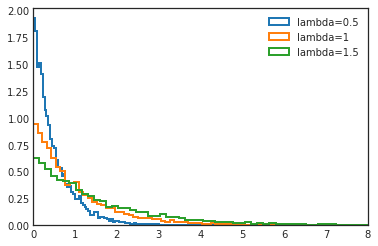

In [ ]:
for scale in [0.5, 1, 1.5]:
  xs = np.random.exponential(scale=scale,size=10000)
  plt.hist(xs, bins=100, histtype='step', density=True, linewidth=2, label=f'lambda={scale}')

plt.legend()
plt.xlim([0,8])
plt.show()

### (2) 캘리포니아 집값 데이터 변수별 분포 그리기



* `/content/sample_data/california_housing_test.csv`을 불러오세요.
* 9개의 변수의 분포를 3 x 3 figure에 `seaborn`을 이용해 그려주세요.
* `kde` 선을 (histplot 옵션 )추가해 주세요.

```
df=pd.read_csv('/content/sample_data/california_housing_test.csv')
```

In [ ]:
df=pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


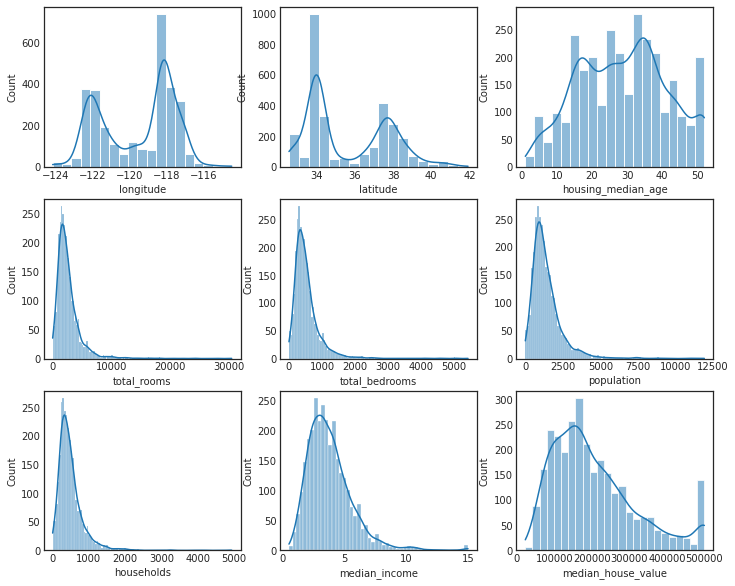

In [ ]:
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns):
  plt.subplot(3,3,i+1)
  sns.histplot(df[column],kde=True)
plt.show()